<a href="https://colab.research.google.com/github/stephenardy/gopayApp_sentimentanalysis/blob/main/Gopay_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Data Diri***

*   Nama Lengkap : Stephen Ardy
*   Username : stephen29393
*   Email : ardystephen@gmail.com







Sentiment Analysis Pengguna Terhadap Aplikasi Gopay

In [43]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

from wordcloud import WordCloud

import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

##Import Dataset

In [44]:
review_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Gopay_SentimentAnalysis/Dataset/review_gopay.csv')
review_df.head()

,reviewId,content
0,86f1a2fc-ecf4-487f-9db6-cb9535671196,best
1,c3e70694-cec1-4c08-b715-c822990ce59f,Semoga Suka Ya Gopay
2,10f42b43-f450-45ba-a5aa-ccdd65827386,Sangat membantu
3,323d53f3-e8ee-43b0-a366-e3de585a64d9,"Aplikasi yang sangat baik, sangat membantu utk..."
4,551b4689-00c6-471f-a33a-a144106b057b,mantap 👍


In [45]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   reviewId  50000 non-null  object
 1   content   50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


##Text Preprocessing

In [46]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka

    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    return text

def casefoldingText(text): # Mengubah semua karakter dalam teks menjadi huruf kecil
    text = text.lower()
    return text

def tokenizingText(text): # Memecah atau membagi string, teks menjadi daftar token
    text = word_tokenize(text)
    return text

def filteringText(text): # Menghapus stopwords dalam teks
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy","hmmm","hmm","lah","y","nich"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text):

    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    words = text.split()

    stemmed_words = [stemmer.stem(word) for word in words]

    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence


In [47]:
import csv

slangwords = {"ama": "sama", "klo": "kalau", "ttp": "tetap", "jd": "jadi", "jdi": "jadi", "@": "di", "abis": "habis", "masi": "masih", "bgt": "banget",
              "maks": "maksimal", "gk": "tidak" , "ga": "tidak", "gak": "tidak", "tdk": "tidak", "gabisa": "tidak bisa", "ngalamin": "mengalami", "yg": "yang",
              "blum": "belum", "blom": "belum", "tf": "transfer", "bngt": "banget", "slalu": "selalu", "jd": "jadi", "utk": "untuk", "apk": "aplikasi",
              "kasi": "kasih", "knpa": "kenapa", "bln": "bulan"}

slangwords_extra = {}

csv_file_path = '/content/drive/MyDrive/Colab Notebooks/Gopay_SentimentAnalysis/Dataset/colloquial-indonesian-lexicon.csv'

with open(csv_file_path, mode='r', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        slangwords_extra[row['slang']] = row['formal']

slangwords.update(slangwords_extra)

def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [48]:
review_df['text_clean'] = review_df['content'].apply(cleaningText)

review_df['text_casefoldingText'] = review_df['text_clean'].apply(casefoldingText)

review_df['text_slangwords'] = review_df['text_casefoldingText'].apply(fix_slangwords)

review_df['text_tokenizingText'] = review_df['text_slangwords'].apply(tokenizingText)

review_df['text_stopword'] = review_df['text_tokenizingText'].apply(filteringText)

review_df['text_akhir'] = review_df['text_stopword'].apply(toSentence)

In [49]:
review_df.head()

,reviewId,content,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,86f1a2fc-ecf4-487f-9db6-cb9535671196,best,best,best,best,[best],[best],best
1,c3e70694-cec1-4c08-b715-c822990ce59f,Semoga Suka Ya Gopay,Semoga Suka Ya Gopay,semoga suka ya gopay,semoga suka ya gopay,"[semoga, suka, ya, gopay]","[semoga, suka, gopay]",semoga suka gopay
2,10f42b43-f450-45ba-a5aa-ccdd65827386,Sangat membantu,Sangat membantu,sangat membantu,sangat membantu,"[sangat, membantu]",[membantu],membantu
3,323d53f3-e8ee-43b0-a366-e3de585a64d9,"Aplikasi yang sangat baik, sangat membantu utk...",Aplikasi yang sangat baik sangat membantu utk ...,aplikasi yang sangat baik sangat membantu utk ...,aplikasi yang sangat baik sangat membantu untu...,"[aplikasi, yang, sangat, baik, sangat, membant...","[aplikasi, membantu, transaksi, keuangan, tran...",aplikasi membantu transaksi keuangan transfer ...
4,551b4689-00c6-471f-a33a-a144106b057b,mantap 👍,mantap,mantap,mantap,[mantap],[mantap],mantap


In [50]:
review_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Gopay_SentimentAnalysis/Dataset/cleanreview.csv', index=0)

##Skema Pelatihan 1


```
Labeling: Indonesian Lexicon
Data Split: train 80%, test 20%
Feature Extraction: TF-IDF
Modeling: Naive Bayes
```

In [51]:
clean_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Gopay_SentimentAnalysis/Dataset/cleanreview.csv')
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              50000 non-null  object
 1   content               50000 non-null  object
 2   text_clean            49332 non-null  object
 3   text_casefoldingText  49332 non-null  object
 4   text_slangwords       49332 non-null  object
 5   text_tokenizingText   50000 non-null  object
 6   text_stopword         50000 non-null  object
 7   text_akhir            48334 non-null  object
dtypes: object(8)
memory usage: 3.1+ MB


In [52]:
import ast
clean_df['text_stopword'] = clean_df['text_stopword'].apply(ast.literal_eval)
clean_df['text_stopword'] = clean_df['text_stopword'].apply(lambda x: x if isinstance(x, list) and len(x) > 0 else ["empty"])
clean_df = clean_df.dropna()
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48334 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              48334 non-null  object
 1   content               48334 non-null  object
 2   text_clean            48334 non-null  object
 3   text_casefoldingText  48334 non-null  object
 4   text_slangwords       48334 non-null  object
 5   text_tokenizingText   48334 non-null  object
 6   text_stopword         48334 non-null  object
 7   text_akhir            48334 non-null  object
dtypes: object(8)
memory usage: 3.3+ MB


###Labeling

In [53]:
import csv
import requests
from io import StringIO

lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/fajri91/InSet/master/positive.tsv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter='\t')
    next(reader)

    for row in reader:
        lexicon_positive[row[0]] = int(row[1])

else:
    print("Failed to fetch positive lexicon data")


lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/fajri91/InSet/master/negative.tsv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter='\t')
    next(reader)

    for row in reader:
        lexicon_negative[row[0]] = int(row[1])

else:
    print("Failed to fetch negative lexicon data")

In [54]:
# Fungsi untuk menentukan polaritas sentimen dari tweet

def sentiment_analysis_lexicon_indonesia(text):

    score = 0

    for word in text:
        if word in lexicon_positive:
            score = score + lexicon_positive[word]

    for word in text:
        if word in lexicon_negative:
            score = score + lexicon_negative[word]

    if score > 0:
        polarity = 'positive'
    elif score < 0:
        polarity = 'negative'
    else:
        polarity = 'neutral'

    return score, polarity

In [55]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
positive    25272
negative    13178
neutral      9884
Name: count, dtype: int64


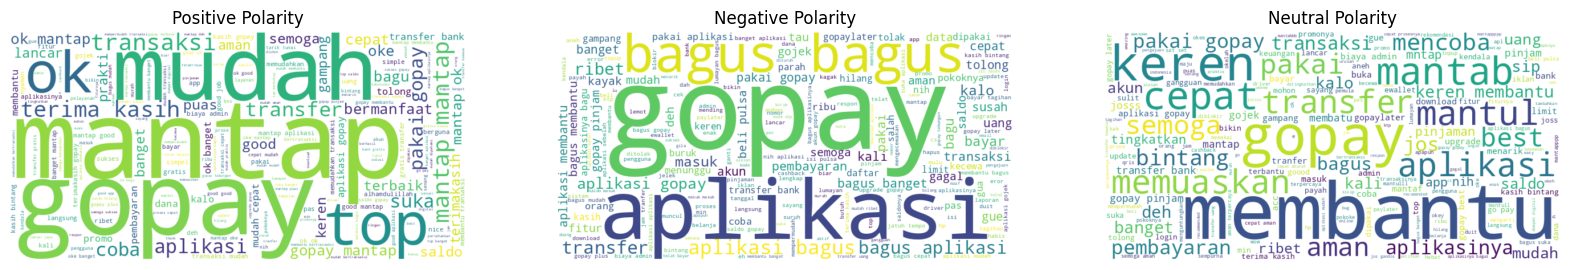

In [56]:
# Filter positive and negative texts
positive_texts = " ".join(clean_df[clean_df['polarity'] == 'positive']['text_akhir'])
negative_texts = " ".join(clean_df[clean_df['polarity'] == 'negative']['text_akhir'])
neutral_texts = " ".join(clean_df[clean_df['polarity'] == 'neutral']['text_akhir'])

# Generate word clouds
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_texts)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_texts)
neutral_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neutral_texts)


# Display the word clouds
plt.figure(figsize=(20, 10))

# Positive word cloud
plt.subplot(1, 3, 1)
plt.title("Positive Polarity")
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')

# Negative word cloud
plt.subplot(1, 3, 2)
plt.title("Negative Polarity")
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')

# Neutral word cloud
plt.subplot(1, 3, 3)
plt.title("Neutral Polarity")
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()

In [57]:
clean_df.iloc[:, 7:10]

,text_akhir,polarity_score,polarity
0,best,0,neutral
1,semoga suka gopay,2,positive
2,membantu,0,neutral
3,aplikasi membantu transaksi keuangan transfer ...,10,positive
4,mantap,5,positive
...,...,...,...
49995,lumayan,-1,negative
49996,gopay keren aplikasi membantu pembayaran pemba...,-1,negative
49997,semoga php gopaylater,-4,negative
49998,putar putar mengerti,0,neutral


###Data Splitting and Feature Extraction

TF-IDF

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X = clean_df['text_akhir']
y = clean_df['polarity']

tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8, ngram_range=(1,2))
X_tfidf = tfidf.fit_transform(X)

features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

features_df

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

###Modeling

Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

random_forest = RandomForestClassifier()

random_forest.fit(X_train.toarray(), y_train)

y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())

accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 0.9481987224248066
Random Forest - accuracy_test: 0.8860039308989345


###Inference Cell

In [61]:
kalimat_test = input("Pendapatmu terhadap aplikasi Gopay:")

# Preprocessing pada ulasan pengguna
kalimat_final = cleaningText(kalimat_test)
kalimat_final = casefoldingText(kalimat_final)
kalimat_final = fix_slangwords(kalimat_final)
kalimat_final = tokenizingText(kalimat_final)
kalimat_final = filteringText(kalimat_final)
kalimat_final = toSentence(kalimat_final)

X_kalimat = tfidf.transform({kalimat_final})

pred_kalimat_rf = random_forest.predict(X_kalimat)

print('Random Forest Result:', pred_kalimat_rf)

Pendapatmu terhadap aplikasi Gopay:Aplikasi memudahkan transaksi sehari-hari
Random Forest Result: ['positive']


##Skema Pelatihan 2


```
Labeling: Indonesian Lexicon
Data Split: train 70%, test 30%
Feature Extraction: TF-IDF
Modeling: Support Vector Machine
```

In [62]:
clean_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Gopay_SentimentAnalysis/Dataset/cleanreview.csv')
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              50000 non-null  object
 1   content               50000 non-null  object
 2   text_clean            49332 non-null  object
 3   text_casefoldingText  49332 non-null  object
 4   text_slangwords       49332 non-null  object
 5   text_tokenizingText   50000 non-null  object
 6   text_stopword         50000 non-null  object
 7   text_akhir            48334 non-null  object
dtypes: object(8)
memory usage: 3.1+ MB


In [63]:
import ast
clean_df['text_stopword'] = clean_df['text_stopword'].apply(ast.literal_eval)
clean_df['text_stopword'] = clean_df['text_stopword'].apply(lambda x: x if isinstance(x, list) and len(x) > 0 else ["empty"])
clean_df = clean_df.dropna()
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48334 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              48334 non-null  object
 1   content               48334 non-null  object
 2   text_clean            48334 non-null  object
 3   text_casefoldingText  48334 non-null  object
 4   text_slangwords       48334 non-null  object
 5   text_tokenizingText   48334 non-null  object
 6   text_stopword         48334 non-null  object
 7   text_akhir            48334 non-null  object
dtypes: object(8)
memory usage: 3.3+ MB


###Labeling

In [64]:
import csv
import requests
from io import StringIO

lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/fajri91/InSet/master/positive.tsv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter='\t')
    next(reader)

    for row in reader:
        lexicon_positive[row[0]] = int(row[1])

else:
    print("Failed to fetch positive lexicon data")


lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/fajri91/InSet/master/negative.tsv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter='\t')
    next(reader)

    for row in reader:
        lexicon_negative[row[0]] = int(row[1])

else:
    print("Failed to fetch negative lexicon data")

In [65]:
def sentiment_analysis_lexicon_indonesia(text):

    score = 0

    for word in text:
        if word in lexicon_positive:
            score = score + lexicon_positive[word]

    for word in text:
        if word in lexicon_negative:
            score = score + lexicon_negative[word]

    if score > 0:
        polarity = 'positive'
    elif score < 0:
        polarity = 'negative'
    else:
        polarity = 'neutral'

    return score, polarity

In [66]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
positive    25272
negative    13178
neutral      9884
Name: count, dtype: int64


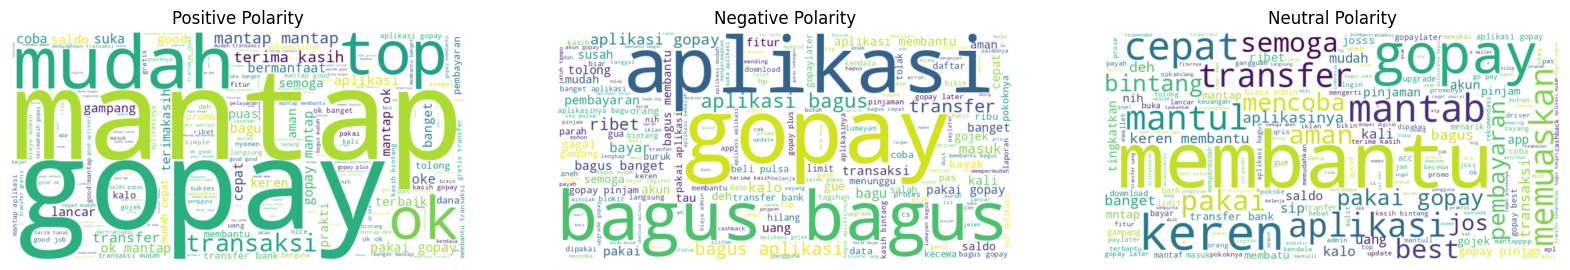

In [67]:
# Filter positive and negative texts
positive_texts = " ".join(clean_df[clean_df['polarity'] == 'positive']['text_akhir'])
negative_texts = " ".join(clean_df[clean_df['polarity'] == 'negative']['text_akhir'])
neutral_texts = " ".join(clean_df[clean_df['polarity'] == 'neutral']['text_akhir'])

# Generate word clouds
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_texts)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_texts)
neutral_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neutral_texts)


# Display the word clouds
plt.figure(figsize=(20, 10))

# Positive word cloud
plt.subplot(1, 3, 1)
plt.title("Positive Polarity")
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')

# Negative word cloud
plt.subplot(1, 3, 2)
plt.title("Negative Polarity")
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')

# Neutral word cloud
plt.subplot(1, 3, 3)
plt.title("Neutral Polarity")
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()

In [68]:
clean_df.iloc[:, 7:10]

,text_akhir,polarity_score,polarity
0,best,0,neutral
1,semoga suka gopay,2,positive
2,membantu,0,neutral
3,aplikasi membantu transaksi keuangan transfer ...,10,positive
4,mantap,5,positive
...,...,...,...
49995,lumayan,-1,negative
49996,gopay keren aplikasi membantu pembayaran pemba...,-1,negative
49997,semoga php gopaylater,-4,negative
49998,putar putar mengerti,0,neutral


###Data Splitting and Feature Extraction

TF-IDF

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X = clean_df['text_akhir']
y = clean_df['polarity']

tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8, ngram_range=(1,2))
X_tfidf = tfidf.fit_transform(X)

features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

features_df

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

###Modeling

Support Vector Machine

In [71]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_model = SVC()

svm_model.fit(X_train.toarray(), y_train)

y_pred_train_svm = svm_model.predict(X_train.toarray())
y_pred_test_svm = svm_model.predict(X_test.toarray())

accuracy_train_svm = accuracy_score(y_pred_train_svm, y_train)
accuracy_test_svm = accuracy_score(y_pred_test_svm, y_test)

print('Support Vector Machine - accuracy_train:', accuracy_train_svm)
print('Support Vector Machine - accuracy_test:', accuracy_test_svm)

Support Vector Machine - accuracy_train: 0.9189253096089617
Support Vector Machine - accuracy_test: 0.8944900351699883


###Inference Cell

In [72]:
kalimat_test = input("Pendapatmu terhadap aplikasi Gopay:")

# Preprocessing pada ulasan pengguna
kalimat_final = cleaningText(kalimat_test)
kalimat_final = casefoldingText(kalimat_final)
kalimat_final = fix_slangwords(kalimat_final)
kalimat_final = tokenizingText(kalimat_final)
kalimat_final = filteringText(kalimat_final)
kalimat_final = toSentence(kalimat_final)

X_kalimat = tfidf.transform({kalimat_final})

pred_kalimat_svm = svm_model.predict(X_kalimat.toarray())

print('Support Vector Machine Result:', pred_kalimat_svm)

Pendapatmu terhadap aplikasi Gopay:Aplikasi lambat
Support Vector Machine Result: ['negative']


##Skema Pelatihan 3


```
Labeling: Indonesian Lexicon
Data Split: train 80%, test 20%
Feature Extraction: Tokenizer
Modeling: Neural Network
```

In [73]:
clean_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Gopay_SentimentAnalysis/Dataset/cleanreview.csv')
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              50000 non-null  object
 1   content               50000 non-null  object
 2   text_clean            49332 non-null  object
 3   text_casefoldingText  49332 non-null  object
 4   text_slangwords       49332 non-null  object
 5   text_tokenizingText   50000 non-null  object
 6   text_stopword         50000 non-null  object
 7   text_akhir            48334 non-null  object
dtypes: object(8)
memory usage: 3.1+ MB


In [74]:
import ast
clean_df['text_stopword'] = clean_df['text_stopword'].apply(ast.literal_eval)
clean_df['text_stopword'] = clean_df['text_stopword'].apply(lambda x: x if isinstance(x, list) and len(x) > 0 else ["empty"])
clean_df = clean_df.dropna()
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48334 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              48334 non-null  object
 1   content               48334 non-null  object
 2   text_clean            48334 non-null  object
 3   text_casefoldingText  48334 non-null  object
 4   text_slangwords       48334 non-null  object
 5   text_tokenizingText   48334 non-null  object
 6   text_stopword         48334 non-null  object
 7   text_akhir            48334 non-null  object
dtypes: object(8)
memory usage: 3.3+ MB


###Labeling

In [75]:
import csv
import requests
from io import StringIO

lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')

    for row in reader:
        lexicon_positive[row[0]] = int(row[1])

else:
    print("Failed to fetch positive lexicon data")


lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')

    for row in reader:
        lexicon_negative[row[0]] = int(row[1])

else:
    print("Failed to fetch negative lexicon data")

In [76]:
def sentiment_analysis_lexicon_indonesia(text):

    score = 0

    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]

    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]

    polarity=''

    if (score > 0):
        polarity = 'positive'

    elif (score < 0):
        polarity = 'negative'

    else:
        polarity = 'neutral'

    return score, polarity

In [77]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
positive    25272
negative    13178
neutral      9884
Name: count, dtype: int64


###Feature Extraction

In [78]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

texts = clean_df['text_akhir'].astype(str).tolist()
labels = clean_df['polarity'].astype(str).tolist()

label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
labels = to_categorical(labels)

In [79]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index

data = pad_sequences(sequences, maxlen=max_len)

###Modeling & Data Split

In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalMaxPooling1D, Dense


embedding_dim = 50
num_classes = labels.shape[1]

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))
model.add(GlobalMaxPooling1D())
model.add(Dense(10, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [81]:
from sklearn.model_selection import train_test_split
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
967/967 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7472 - loss: 0.6002 - val_accuracy: 0.9280 - val_loss: 0.2253
Epoch 2/10
967/967 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9429 - loss: 0.1731 - val_accuracy: 0.9426 - val_loss: 0.1725
Epoch 3/10
967/967 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9647 - loss: 0.1078 - val_accuracy: 0.9500 - val_loss: 0.1563
Epoch 4/10
967/967 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9759 - loss: 0.0761 - val_accuracy: 0.9506 - val_loss: 0.1506
Epoch 5/10
967/967 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9842 - loss: 0.0558 - val_accuracy: 0.9516 - val_loss: 0.1539
Epoch 6/10
967/967 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9874 - loss: 0.0437 - val_accuracy: 0.9485 - val_loss: 0.1631
Epoch 7/10
967/967 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9918 - loss: 0.0328 - val_accuracy: 0.9444 - val_loss: 0.1831
Epoch 8/10
967/967 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9938 - loss: 0.0267 - val_accuracy

In [82]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9422 - loss: 0.2057
Test Accuracy: 0.9415537118911743


###Inference Cell

In [92]:
def predict_sentiment(text, model, tokenizer, max_len, label_encoder):

    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=max_len)

    prediction = model.predict(padded_sequence)

    predicted_class = np.argmax(prediction, axis=1)

    predicted_label = label_encoder.inverse_transform(predicted_class)

    return predicted_label[0], prediction[0]

new_text = input("Pendapatmu terhadap aplikasi Gopay:")
predicted_label, prediction_probabilities = predict_sentiment(new_text, model, tokenizer, max_len, label_encoder)

print(f"Predicted Label: {predicted_label}")
print(f"Prediction Probabilities: {prediction_probabilities}")

Pendapatmu terhadap aplikasi Gopay:aplikasinya boleh juga
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Label: neutral
Prediction Probabilities: [2.7056776e-06 9.9980146e-01 1.9585318e-04]
